In [1]:
import os
import pandas as pd
import numpy as np
import dask.dataframe as dd
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as ss
import json
import pathlib
from pycytominer import aggregate, normalize

%matplotlib inline  

In [2]:
# Set data input folder
# Download files described in README.md to this folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)
if not os.path.exists(os.path.join(output_folder,"figure_panels")):
    os.makedirs(os.path.join(output_folder,"figure_panels"), exist_ok=True)

In [3]:
# Load the mAP values from each analysis and organize into dfs
df_results_cp = pd.read_csv('../CP_1_FDR/outputs/CP498_CP_1_FDR_mAP_values.csv')
df_results_cp['condition'] = 'CP'
df_results_saber = pd.read_csv('../SABER/outputs/CP498_SABER_mAP_values.csv')
df_results_saber['condition'] = 'SABER'
df_results_saber_1_2 = pd.read_csv('../SABER-1-2/outputs/CP498_SABER_1_2_mAP_values.csv')
df_results_saber_1_2['condition'] = 'SABER-1-2'
df_results_saber_1_2_no_wga_cona = pd.read_csv('../SABER-1-2_no_WGA_no_ConA/outputs/CP498_SABER_1_2_no_wga_no_cona_mAP_values.csv')
df_results_saber_1_2_no_wga_cona['condition'] = 'SABER-1-2_no_wga_cona'
df_results_saber_1_2_no_caln_gm130 = pd.read_csv('../SABER-1-2-no_Calnexin_no_GM130/outputs/CP498_SABER_1_2_no_caln_no_gma130_mAP_values.csv')
df_results_saber_1_2_no_caln_gm130['condition'] = 'SABER-1-2_no_caln_gm130'

df_results_1 = pd.concat([df_results_cp,df_results_saber_1_2,df_results_saber])
df_results_2 = pd.concat([df_results_saber_1_2,df_results_saber_1_2_no_wga_cona,df_results_saber_1_2_no_caln_gm130])

df_results_2

,gene,group,mAP,condition
0,ABCF1,Whole cell hit,0.587798,SABER-1-2
1,ACTR2,Whole cell hit,0.906250,SABER-1-2
2,ACTR3,Whole cell hit,0.937500,SABER-1-2
3,ALG13,Whole cell hit,0.877083,SABER-1-2
4,ALG5,Whole cell hit,0.979167,SABER-1-2
...,...,...,...,...
1175,YWHAH,All gene,0.375000,SABER-1-2_no_caln_gm130
1176,ZC3H8,All gene,0.311574,SABER-1-2_no_caln_gm130
1177,ZC3HC1,All gene,0.226852,SABER-1-2_no_caln_gm130
1178,ZNF131,All gene,0.266667,SABER-1-2_no_caln_gm130


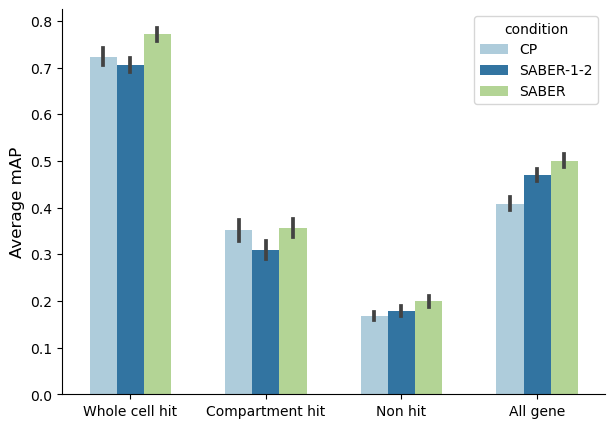

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
errorbar='se'
ax = sns.barplot(data=df_results_1,
                  x='group', 
                  y='mAP',
                  hue = 'condition',
                  errorbar=errorbar,
         #         color='tab:blue',
                  palette=sns.color_palette('Paired'),
                  width=0.6,
                 )


ax.set_title('',size=14)
ax.set_xlabel(None,size=12)
ax.set_ylabel('Average mAP',size=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig(os.path.join(output_folder,'figure_panels','CP498_CP_SABER-1-2_SABER_mAP_values_hits_per_condition_barplot.png'),dpi = 300,bbox_inches='tight')
plt.show()

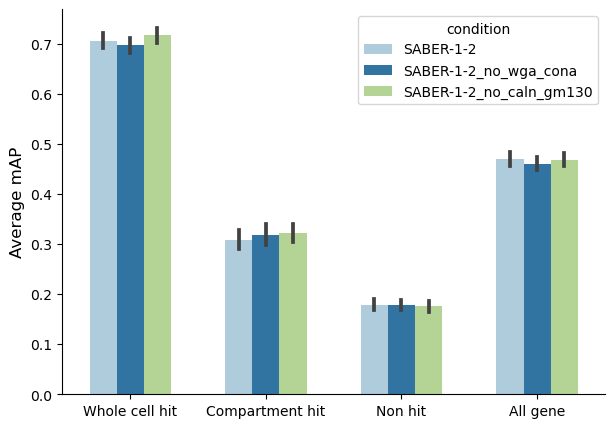

In [5]:
fig, ax = plt.subplots(figsize=(7,5))
errorbar='se'
ax = sns.barplot(data=df_results_2,
                  x='group', 
                  y='mAP',
                  hue = 'condition',
                  errorbar=errorbar,
                #  color='tab:blue',
                  palette=sns.color_palette('Paired'),
                  width=0.6,
                 )


ax.set_title('',size=14)
ax.set_xlabel(None,size=12)
ax.set_ylabel('Average mAP',size=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig(os.path.join(output_folder,'figure_panels','CP498_CP_SABER-1-2_no_wga_no_cona_no_caln_no_gm130_mAP_values_barplot.png'),dpi = 300,bbox_inches='tight')
plt.show()

In [6]:
df_results_3 = pd.concat([df_results_cp,df_results_saber_1_2,df_results_saber])

whole_cell_hits_saber = df_results_3.query('group == "Whole cell hit" & condition == "SABER"')
whole_cell_hits_saber_list = list(whole_cell_hits_saber.gene)

comp_hits_saber = df_results_3.query('group == "Compartment hit" & condition == "SABER"')
comp_hits_saber_list = list(comp_hits_saber.gene)

non_hits_saber = df_results_3.query('group == "Non hit" & condition == "SABER"')
non_hits_saber_list = list(non_hits_saber.gene)

df_results_3['dummy_group']= None

df_results_3.loc[df_results_3['gene'].isin(whole_cell_hits_saber_list),'dummy_group']='Whole cell hit'
df_results_3.loc[df_results_3['gene'].isin(comp_hits_saber_list),'dummy_group']='Compartment hit'
df_results_3.loc[df_results_3['gene'].isin(non_hits_saber_list),'dummy_group']='Non hit'
df_results_3.loc[df_results_3['group']=='All gene','dummy_group']='All gene'
df_results_3

,gene,group,mAP,condition,dummy_group
0,ACTR2,Whole cell hit,1.000000,CP,Whole cell hit
1,ACTR3,Whole cell hit,1.000000,CP,Whole cell hit
2,ALG13,Whole cell hit,0.750000,CP,Whole cell hit
3,ALG5,Whole cell hit,0.640278,CP,Whole cell hit
4,ALG8,Whole cell hit,0.608102,CP,Whole cell hit
...,...,...,...,...,...
1175,YWHAH,All gene,0.472222,SABER,All gene
1176,ZC3H8,All gene,0.470899,SABER,All gene
1177,ZC3HC1,All gene,0.478836,SABER,All gene
1178,ZNF131,All gene,0.343519,SABER,All gene


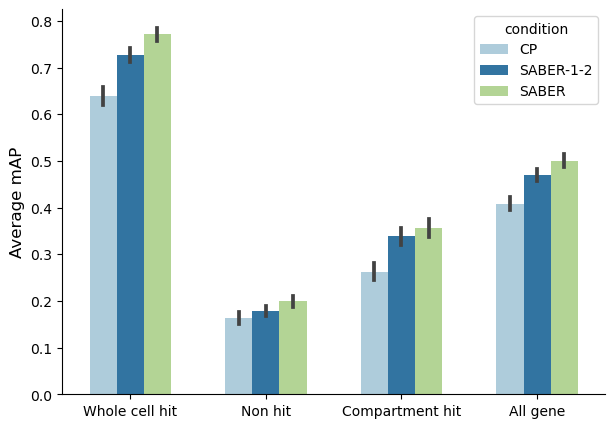

In [7]:
fig, ax = plt.subplots(figsize=(7,5))
errorbar='se'
ax = sns.barplot(data=df_results_3,
                  x='dummy_group', 
                  y='mAP',
                  hue = 'condition',
                  errorbar=errorbar,
                #  color='tab:blue',
                  palette=sns.color_palette('Paired'),
                  width=0.6,
                 )


ax.set_title('',size=14)
ax.set_xlabel(None,size=12)
ax.set_ylabel('Average mAP',size=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig(os.path.join(output_folder,'figure_panels','CP498_CP_SABER-1-2_SABER_mAP_values_hits_per_saber_barplot.png'),dpi = 300,bbox_inches='tight')
plt.show()

In [8]:
df_results_4 = pd.concat([df_results_cp,df_results_saber_1_2,df_results_saber])

whole_cell_hits_CP = df_results_4.query('group == "Whole cell hit" & condition == "CP"')
whole_cell_hits_CP_list = list(whole_cell_hits_CP.gene)

comp_hits_CP = df_results_4.query('group == "Compartment hit" & condition == "CP"')
comp_hits_CP_list = list(comp_hits_CP.gene)

non_hits_CP = df_results_4.query('group == "Non hit" & condition == "CP"')
non_hits_CP_list = list(non_hits_CP.gene)

df_results_4['dummy_group']= None

df_results_4.loc[df_results_4['gene'].isin(whole_cell_hits_CP_list),'dummy_group']='Whole cell hit'
df_results_4.loc[df_results_4['gene'].isin(comp_hits_CP_list),'dummy_group']='Compartment hit'
df_results_4.loc[df_results_4['gene'].isin(non_hits_CP_list),'dummy_group']='Non hit'
df_results_4.loc[df_results_4['group']=='All gene','dummy_group']='All gene'
df_results_4

,gene,group,mAP,condition,dummy_group
0,ACTR2,Whole cell hit,1.000000,CP,Whole cell hit
1,ACTR3,Whole cell hit,1.000000,CP,Whole cell hit
2,ALG13,Whole cell hit,0.750000,CP,Whole cell hit
3,ALG5,Whole cell hit,0.640278,CP,Whole cell hit
4,ALG8,Whole cell hit,0.608102,CP,Whole cell hit
...,...,...,...,...,...
1175,YWHAH,All gene,0.472222,SABER,All gene
1176,ZC3H8,All gene,0.470899,SABER,All gene
1177,ZC3HC1,All gene,0.478836,SABER,All gene
1178,ZNF131,All gene,0.343519,SABER,All gene


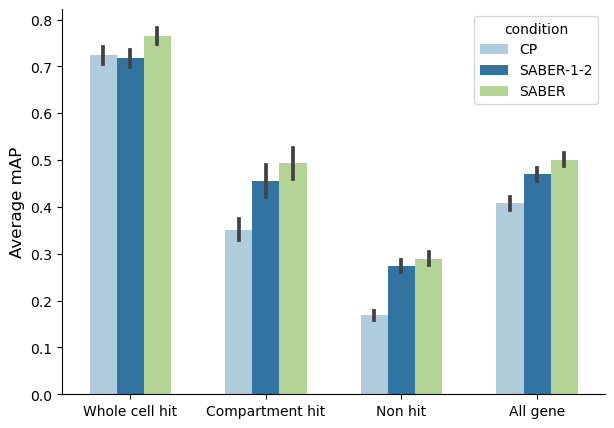

In [9]:
fig, ax = plt.subplots(figsize=(7,5))
errorbar='se'
ax = sns.barplot(data=df_results_4,
                  x='dummy_group', 
                  y='mAP',
                  hue = 'condition',
                  errorbar=errorbar,
                #  color='tab:blue',
                  palette=sns.color_palette('Paired'),
                  width=0.6,
                 )


ax.set_title('',size=14)
ax.set_xlabel(None,size=12)
ax.set_ylabel('Average mAP',size=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#fig.savefig(os.path.join(output_folder,'figure_panels','CP498_CP_1_FDR_mAP_values_barplot.png'),dpi = 300,bbox_inches='tight')
plt.show()

In [10]:
df_results_5 = pd.concat([df_results_cp,df_results_saber_1_2,df_results_saber])

whole_cell_hits_saber_1_2 = df_results_5.query('group == "Whole cell hit" & condition == "SABER-1-2"')
whole_cell_hits_saber_1_2_list = list(whole_cell_hits_saber_1_2.gene)

comp_hits_saber_1_2 = df_results_5.query('group == "Compartment hit" & condition == "SABER-1-2"')
comp_hits_saber_1_2_list = list(comp_hits_saber_1_2.gene)

non_hits_saber_1_2 = df_results_5.query('group == "Non hit" & condition == "SABER-1-2"')
non_hits_saber_1_2_list = list(non_hits_saber_1_2.gene)

df_results_5['dummy_group']= None

df_results_5.loc[df_results_5['gene'].isin(whole_cell_hits_saber_1_2_list),'dummy_group']='Whole cell hit'
df_results_5.loc[df_results_5['gene'].isin(comp_hits_saber_1_2_list),'dummy_group']='Compartment hit'
df_results_5.loc[df_results_5['gene'].isin(non_hits_saber_1_2_list),'dummy_group']='Non hit'
df_results_5.loc[df_results_5['group']=='All gene','dummy_group']='All gene'
df_results_5

,gene,group,mAP,condition,dummy_group
0,ACTR2,Whole cell hit,1.000000,CP,Whole cell hit
1,ACTR3,Whole cell hit,1.000000,CP,Whole cell hit
2,ALG13,Whole cell hit,0.750000,CP,Whole cell hit
3,ALG5,Whole cell hit,0.640278,CP,Whole cell hit
4,ALG8,Whole cell hit,0.608102,CP,Whole cell hit
...,...,...,...,...,...
1175,YWHAH,All gene,0.472222,SABER,All gene
1176,ZC3H8,All gene,0.470899,SABER,All gene
1177,ZC3HC1,All gene,0.478836,SABER,All gene
1178,ZNF131,All gene,0.343519,SABER,All gene


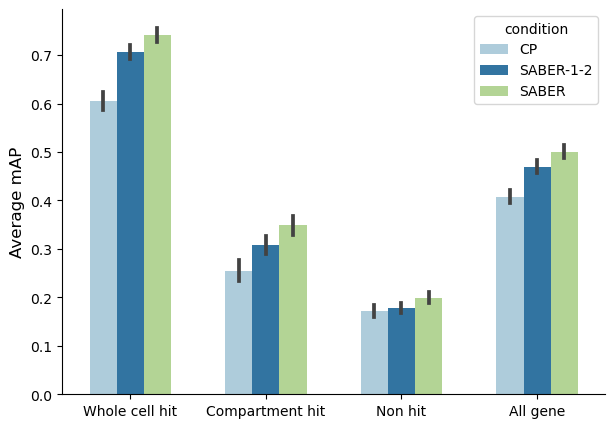

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
errorbar='se'
ax = sns.barplot(data=df_results_5,
                  x='dummy_group', 
                  y='mAP',
                  hue = 'condition',
                  errorbar=errorbar,
                #  color='tab:blue',
                  palette=sns.color_palette('Paired'),
                  width=0.6,
                 )


ax.set_title('',size=14)
ax.set_xlabel(None,size=12)
ax.set_ylabel('Average mAP',size=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#fig.savefig(os.path.join(output_folder,'figure_panels','CP498_CP_1_FDR_mAP_values_barplot.png'),dpi = 300,bbox_inches='tight')
plt.show()